In [ ]:
import numpy as np
import math
x = np.arange(0, 1 + 1/80, 1/80)
y = np.arange(0, 1 + 1/80, 1/80)

S_phi = np.zeros((81, 81))  # Create a 2D array for S_phi
for j in range(81):
  for i in range(81):
    S_phi[i][j] = (2*np.sinh(10*(x[i]-0.5)) + 40*(x[i]-0.5)* np.cosh(10*(x[i]-0.5)) + 100*((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) +
                  2*np.sinh(10*(y[j]-0.5)) + 40*(y[j]-0.5)* np.cosh(10*(y[j]-0.5)) + 100*((y[j]-0.5)**2)*np.sinh(10*(y[j]-0.5)) +
                  4*((x[i]**2)+(y[j]**2))*np.exp(2*x[i]*y[j]))


In [ ]:
# Boundry Conditions
import numpy as np
import math
phi = np.zeros((81, 81))
for i in range (81):
  phi[0][i] = np.sinh(-5)*1/4 + ((y[i]-0.5)**2)*np.sinh(10*(y[i]-0.5)) + 1

for i in range (81):
  phi[80][i] = np.sinh(5)*1/4 + ((y[i]-0.5)**2)*np.sinh(10*(y[i]-0.5)) + np.exp(2*y[i])

for i in range (81):
  phi[i][0] = np.sinh(-5)*1/4 + ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + 1

for i in range (81):
  phi[i][80] = np.sinh(5)*1/4 + ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + np.exp(2*x[i])

# Analytical solution

phi_analytic = np.zeros((81, 81))
for j in range(81):
  for i in range(81):
    phi_analytic[i][j] = ((x[i]-0.5)**2)*np.sinh(10*(x[i]-0.5)) + ((y[j]-0.5)**2)*np.sinh(10*(y[j]-0.5)) + np.exp(2*(x[i]-0.5)*(y[j]-0.5))



In [ ]:
# Gauss Seidel
dh = 1/80
error = float('inf')
n = 0
err_gausss_seidel = np.zeros(12000)

while error > 1e-6:
  error = 0
  n += 1
  for j in range(1, 80):
    for i in range(1, 80):
      phi_n = phi[i][j]
      phi[i][j] = (phi[i+1][j] + phi[i-1][j] + phi[i][j+1] + phi[i][j-1] - S_phi[i][j]*dh*dh) / 4.0
      phi_n_1 = phi[i][j]
      error += abs(phi_n - phi_n_1)
  err_gausss_seidel[n] = error
print(n)

10604


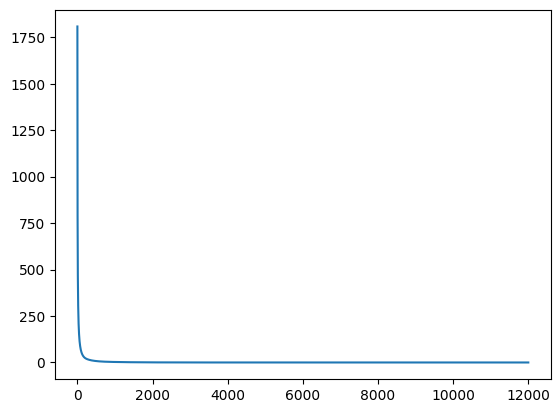

In [ ]:
import matplotlib.pyplot as plt
err_gausss_seidel[0] = float('inf')
plt.plot(err_gausss_seidel)
plt.show()

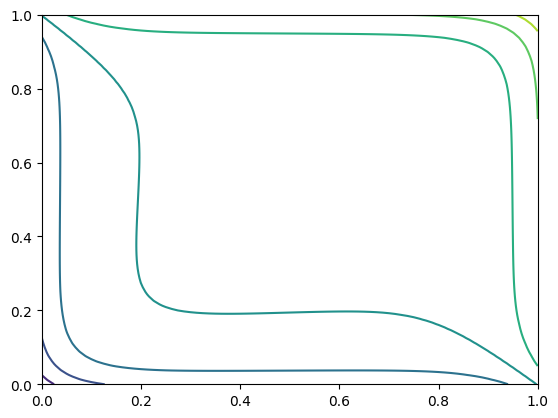

In [ ]:
import matplotlib.pyplot as plt
[X, Y] = np.meshgrid(x, y)

plt.contour(X, Y, phi_analytic)


plt.show()

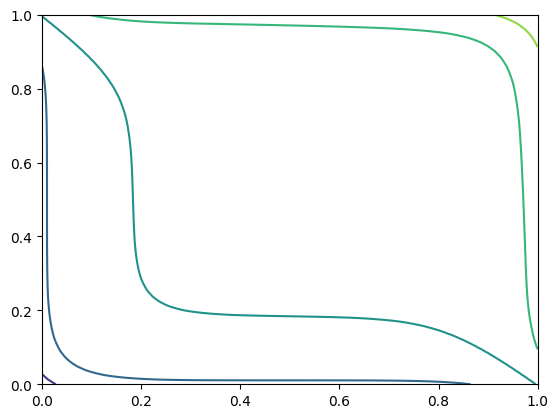

In [ ]:
import matplotlib.pyplot as plt
[X, Y] = np.meshgrid(x, y)

plt.contour(X, Y, phi)


plt.show()

Text(0.5, 0, 'Z')

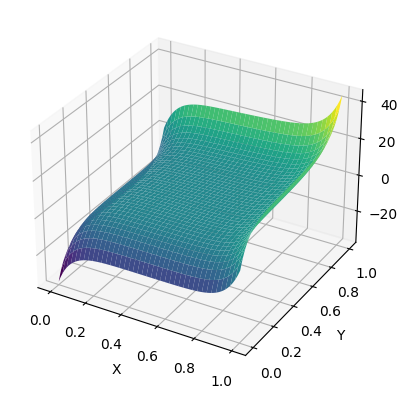

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np



X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, phi, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


Text(0.5, 0, 'Z')

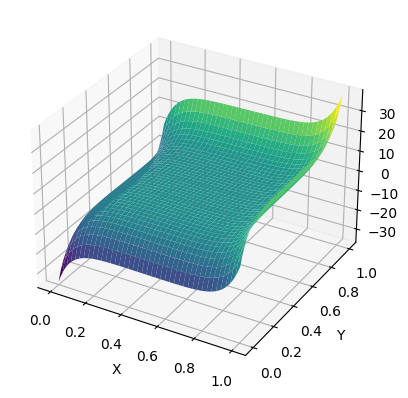

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np



X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, phi_analytic, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')